<a href="https://colab.research.google.com/github/dany4142/data-science-projects/blob/master/image_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install -Uqq fastai
!pip install -Uqq opencv-python
!pip install -Uqq kaggle

In [2]:
from google.colab import drive
import os

drive.mount('/content/drive')
os.chdir('/content/drive/MyDrive/dl')

Mounted at /content/drive


In [11]:
# from google.colab import files
# files.upload()

# !mkdir ~/.kaggle
# !cp kaggle.json ~/.kaggle/
# !chmod 600 ~/.kaggle/kaggle.json

Saving kaggle.json to kaggle (3).json


In [ ]:
# !kaggle datasets download -s puneet6060/intel-image-classification

In [20]:
# !unzip "/content/drive/MyDrive/dl/intel-image-classification.zip" -d "/content/drive/MyDrive/dl/images"

Streaming output truncated to the last 5000 lines.
  inflating: /content/drive/MyDrive/dl/images/seg_train/seg_train/mountain/7506.jpg  
  inflating: /content/drive/MyDrive/dl/images/seg_train/seg_train/mountain/7537.jpg  
  inflating: /content/drive/MyDrive/dl/images/seg_train/seg_train/mountain/7539.jpg  
  inflating: /content/drive/MyDrive/dl/images/seg_train/seg_train/mountain/7551.jpg  
  inflating: /content/drive/MyDrive/dl/images/seg_train/seg_train/mountain/7560.jpg  
  inflating: /content/drive/MyDrive/dl/images/seg_train/seg_train/mountain/7565.jpg  
  inflating: /content/drive/MyDrive/dl/images/seg_train/seg_train/mountain/7578.jpg  
  inflating: /content/drive/MyDrive/dl/images/seg_train/seg_train/mountain/7581.jpg  
  inflating: /content/drive/MyDrive/dl/images/seg_train/seg_train/mountain/7586.jpg  
  inflating: /content/drive/MyDrive/dl/images/seg_train/seg_train/mountain/7647.jpg  
  inflating: /content/drive/MyDrive/dl/images/seg_train/seg_train/mountain/7652.jpg  
  i

In [3]:
import fastai as fst
import fastai.vision.all as fstvision
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import cv2 as cv

In [4]:
path_name = '/content/drive/MyDrive/dl/seg_train/seg_train'
path = fstvision.Path(path_name)
path.ls()

(#6) [Path('/content/drive/MyDrive/dl/seg_train/seg_train/buildings'),Path('/content/drive/MyDrive/dl/seg_train/seg_train/forest'),Path('/content/drive/MyDrive/dl/seg_train/seg_train/glacier'),Path('/content/drive/MyDrive/dl/seg_train/seg_train/mountain'),Path('/content/drive/MyDrive/dl/seg_train/seg_train/sea'),Path('/content/drive/MyDrive/dl/seg_train/seg_train/street')]

In [5]:
data = fstvision.ImageDataLoaders.from_folder(path, train = '.', valid_pct = 0.2, item_tfms = fstvision.Resize(224),
                                            seed = 42)

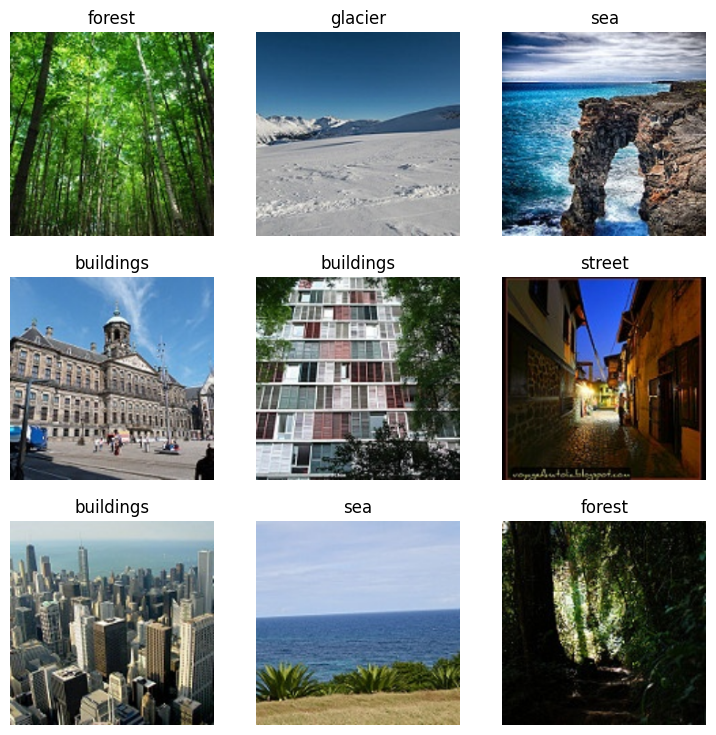

In [6]:
data.show_batch()

In [7]:
learn = fstvision.cnn_learner(data, fstvision.resnet34, metrics = fstvision.error_rate)

/usr/local/lib/python3.10/dist-packages/fastai/vision/learner.py:288: UserWarning: `cnn_learner` has been renamed to `vision_learner` -- please update your code
  warn("`cnn_learner` has been renamed to `vision_learner` -- please update your code")
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet34_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet34_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/resnet34-b627a593.pth" to /root/.cache/torch/hub/checkpoints/resnet34-b627a593

In [8]:
learn.fit_one_cycle(2)

epoch,train_loss,valid_loss,error_rate,time
0,0.497629,0.285893,0.089748,12:07
1,0.274461,0.250613,0.085618,00:16


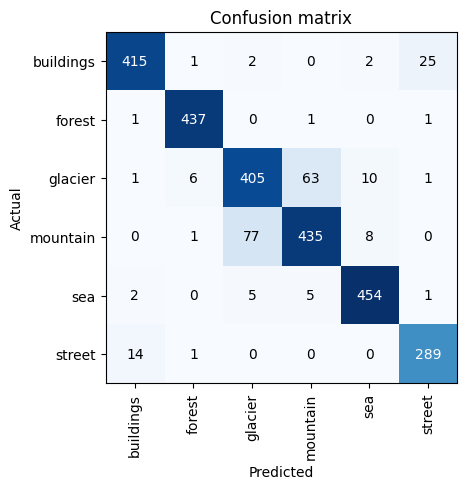

In [12]:
interp = fstvision.ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix()

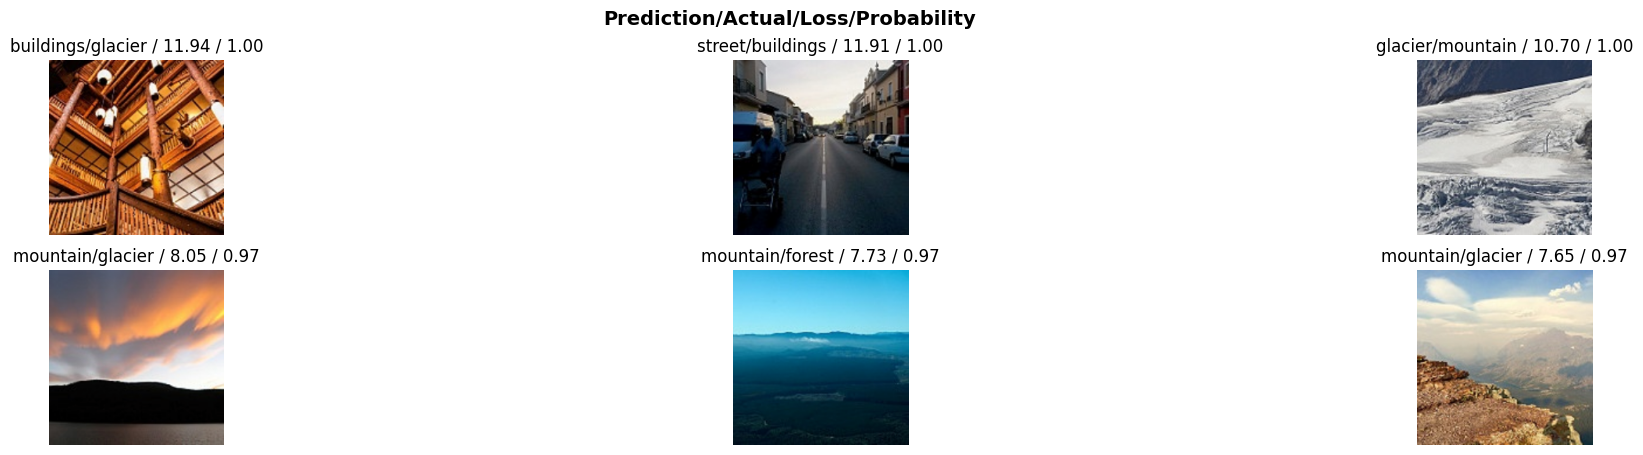

In [13]:
interp.plot_top_losses(6, figsize = (25,5))